In [ ]:
# {r setup, include=FALSE}
knitr::opts_chunk$set(echo = TRUE)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Loading Data

In [ ]:
## Loading my data
# Simply read the data and transform relevant variables to factors datatype.
df = read_csv('run_table_complete.csv')
df$problem = as.factor(df$problem)
df$prompts = as.factor(df$prompts)
df$run_number = as.factor(df$run_number)

# Rename the column energy_consumption to energy_usage
colnames(df)[colnames(df) == 'energy_consumption'] <- 'energy_usage'

# Add a new column energy_consumption = execution_time * energy_usage
df$energy_consumption <- df$execution_time * df$energy_usage

Rows: 360 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): __run_id, __done, problem, prompts
dbl (5): run_number, execution_time, cpu_usage, memory_usage, energy_consump...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
summary(df)

   __run_id            __done                     problem   
 Length:360         Length:360         O_n_problem    :120  
 Class :character   Class :character   O_n2_problem   :120  
 Mode  :character   Mode  :character   O_nlogn_problem:120  
                                                            
                                                            
                                                            
                                                            
                   prompts     run_number  execution_time       cpu_usage     
 base_prompt           :60   1      : 18   Min.   :   0.202   Min.   : 6.274  
 few_shot_prompt       :60   2      : 18   1st Qu.: 172.070   1st Qu.:15.191  
 human                 :60   3      : 18   Median : 263.755   Median :16.863  
 instructed_prompt_de  :60   4      : 18   Mean   : 317.491   Mean   :16.372  
 instructed_prompt_llen:60   5      : 18   3rd Qu.: 292.720   3rd Qu.:17.318  
 instructed_prompt_slen:60   6      : 

## Data Exploration
1. Generate the summary statistics
2. Box plots(considering removing the outliers or not)

In [ ]:
install.packages("knitr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("kableExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘svglite’




In [ ]:
'''
1. Generate the summary statistics
'''

# Summarize energy consumption for each combination of problem and prompts
summary_results <- df %>%
  group_by(problem, prompts) %>%
  summarise(
    Min = min(energy_consumption, na.rm = TRUE),
    Q1 = quantile(energy_consumption, 0.25, na.rm = TRUE),
    Median = median(energy_consumption, na.rm = TRUE),
    Mean = mean(energy_consumption, na.rm = TRUE),
    SD = sd(energy_consumption, na.rm = TRUE),
    Q3 = quantile(energy_consumption, 0.75, na.rm = TRUE),
    Max = max(energy_consumption, na.rm = TRUE),
    .groups = 'drop'  # Ungroup after summarizing
  )

# Transpose the summary_results table
transposed_summary <- summary_results %>%
  pivot_longer(cols = Min:Max, names_to = "Statistic", values_to = "Value") %>%
  pivot_wider(names_from = c(problem, prompts), values_from = Value)

# Create a beautified transposed table
table_output <- kable(transposed_summary,
                      caption = "Transposed Summary Statistics of Energy Consumption by Problem and Prompts",
                      format = "html",  # Change to "latex" if you are using R Markdown with PDF output
                      align = "c",      # Center align all columns
                      digits = 2) %>%
  kable_styling(full_width = F,
                position = "left",
                bootstrap_options = c("striped", "hover", "condensed")) %>%
  column_spec(1, bold = TRUE) %>%  # Bold the first column (statistic names)
  add_header_above(c("Statistic" = 1, "Summary Statistics" = ncol(transposed_summary) - 1)) %>%  # Add header above
  footnote(general = "Note: All values are based on the energy consumption data.")

# Display the table
print(table_output)

<table class="table table-striped table-hover table-condensed" style="width: auto !important; border-bottom: 0;">
<caption>Transposed Summary Statistics of Energy Consumption by Problem and Prompts</caption>
 <thead>
<tr>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="1"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Statistic</div></th>
<th style="border-bottom:hidden;padding-bottom:0; padding-left:3px;padding-right:3px;text-align: center; " colspan="18"><div style="border-bottom: 1px solid #ddd; padding-bottom: 5px; ">Summary Statistics</div></th>
</tr>
  <tr>
   <th style="text-align:center;"> Statistic </th>
   <th style="text-align:center;"> O_n_problem_base_prompt </th>
   <th style="text-align:center;"> O_n_problem_few_shot_prompt </th>
   <th style="text-align:center;"> O_n_problem_human </th>
   <th style="text-align:center;"> O_n_problem_instructed_prompt_de </th>
   <th style="text-align:

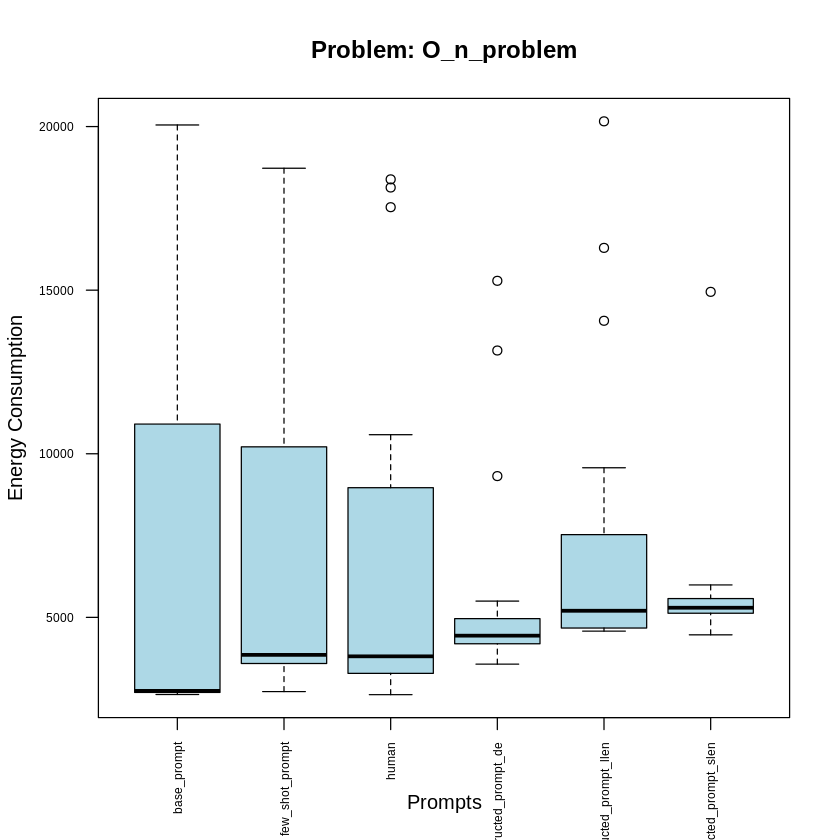

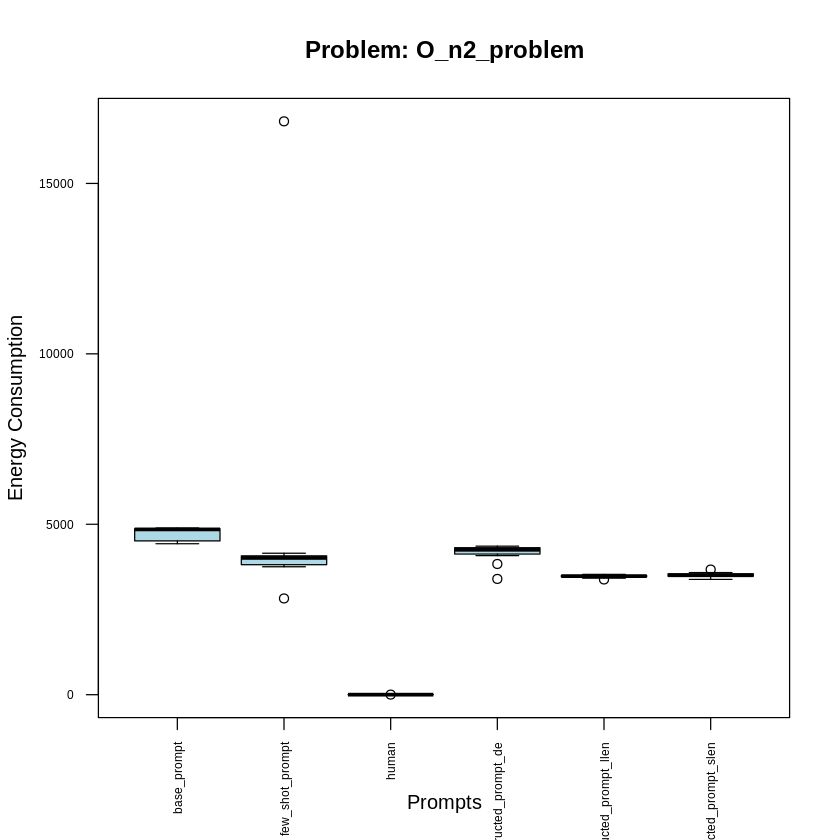

2643.828,2731.714,2638.031,3570.948,4579.434,4467.025
2706.648,3589.994,3288.810,4193.519,4674.438,5126.968
2754.570,3854.189,3809.376,4441.141,5201.849,5294.211
10907.406,10212.116,8962.838,4960.953,7529.311,5574.253
20047.846,18725.744,10582.490,5497.334,9572.752,5991.606
-142.7477,1514.601,1804.749,4170.007,4193.226,5136.186
5651.8875,6193.776,5814.003,4712.274,6210.472,5452.236
4429.168,3753.239,0.949431,4079.978,3417.809,3382.622
4512.518,3813.787,1.026884,4126.183,3459.590,3476.607
4849.425,4011.975,1.097027,4250.633,3478.968,3503.750
4869.656,4073.670,1.162526,4312.750,3497.990,3546.813


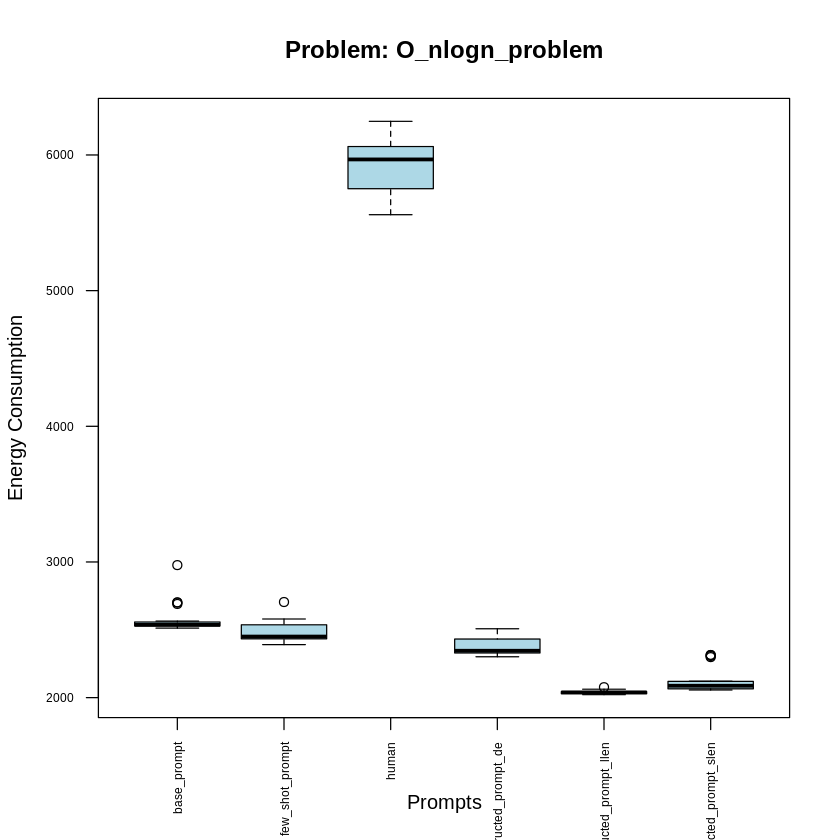

In [ ]:
'''
2. Drawing box plots
'''

df %>%
  group_by(problem) %>%
  group_split() %>%
  lapply(function(group_data) {
    # Create the box plot
    boxplot(energy_consumption ~ prompts,
            data = group_data,
            main = paste("Problem:", unique(group_data$problem)),
            xlab = "Prompts",
            ylab = "Energy Consumption",
            col = "lightblue",
            las = 2,  # Rotate x-axis labels to be vertical
            cex.axis = 0.6)  # Adjust label size if necessary
  })

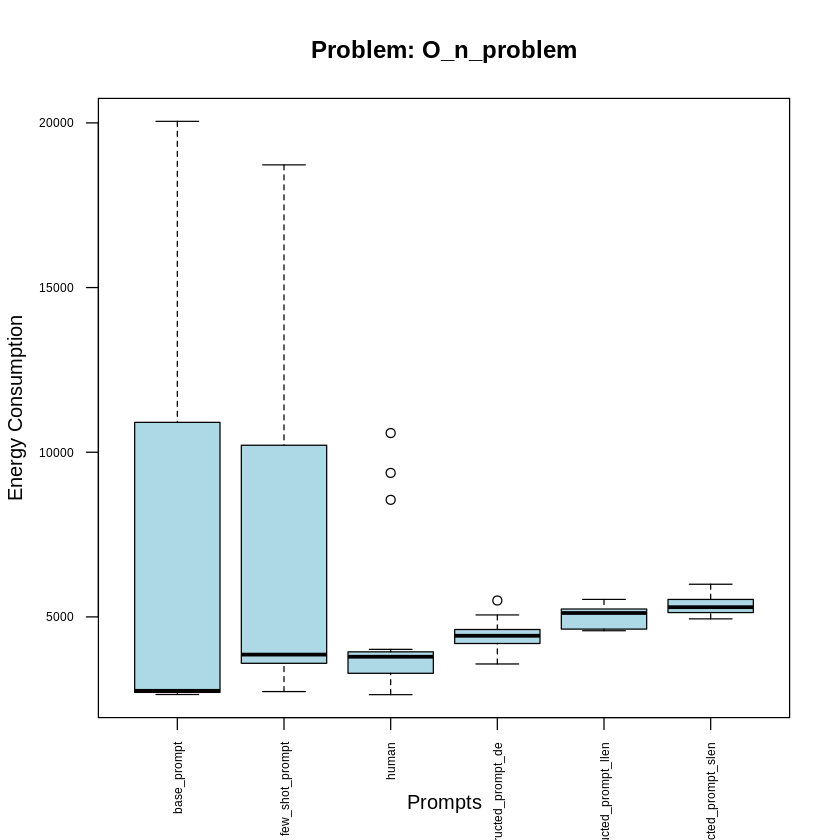

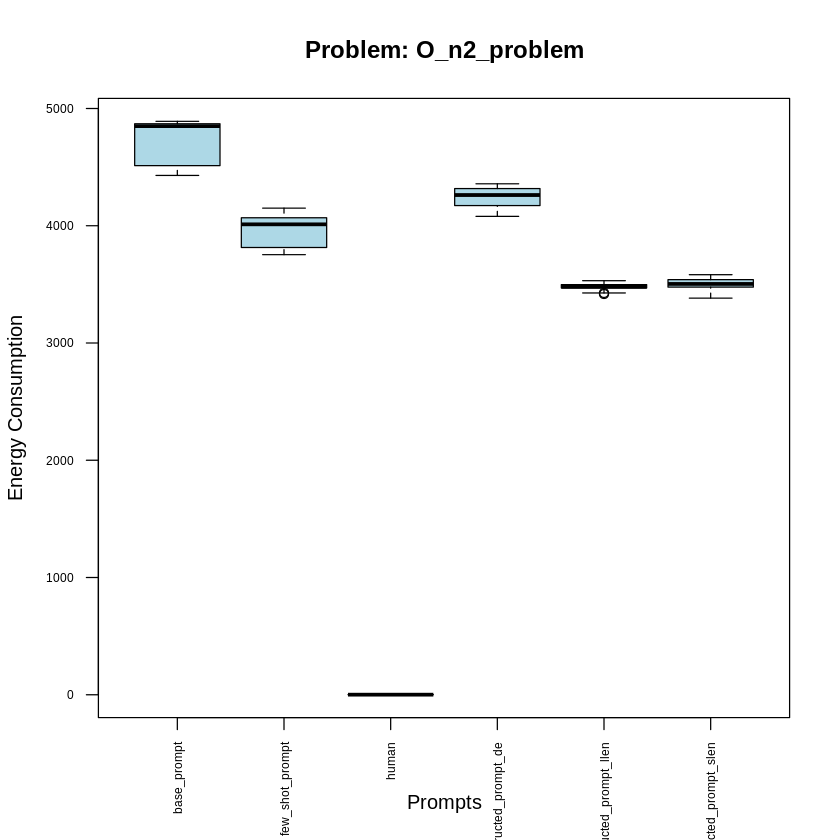

2643.828,2731.714,2638.031,3570.948,4579.434,4939.949
2706.648,3589.994,3287.158,4191.380,4629.191,5130.511
2754.570,3854.189,3789.324,4426.440,5118.474,5294.211
10907.406,10212.116,3938.443,4616.416,5239.294,5530.089
20047.846,18725.744,4013.609,5059.464,5530.806,5991.606
-142.7477,1514.601,3539.748,4263.563,4869.580,5145.404
5651.8875,6193.776,4038.901,4589.316,5367.368,5443.017
4429.168,3753.239,0.949431,4079.978,3426.688,3382.622
4512.518,3814.427,1.026884,4171.870,3469.425,3476.607
4849.425,4011.975,1.094495,4261.889,3479.311,3503.741
4869.656,4068.085,1.153006,4316.979,3497.990,3540.178


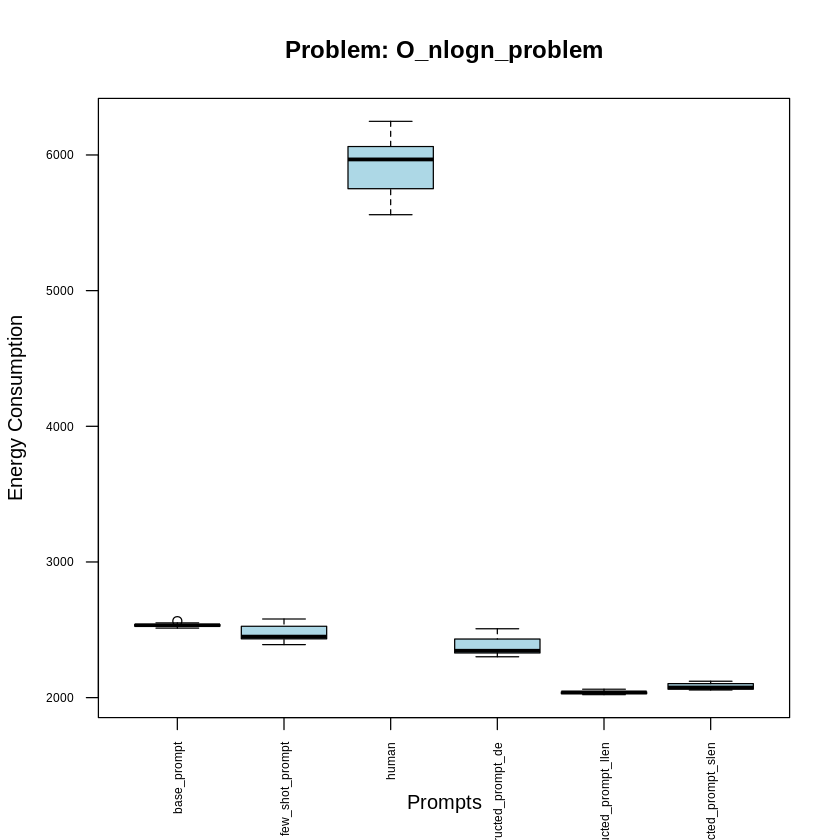

In [ ]:
'''
removing the outliers with IQR and drawing the boxplot

'''

# Load necessary libraries
library(dplyr)
library(ggplot2)

# Calculate IQR and remove outliers
cleaned_data <- df %>%
  group_by(problem, prompts) %>%
  mutate(
    Q1 = quantile(energy_consumption, 0.25),  # First quartile
    Q3 = quantile(energy_consumption, 0.75),  # Third quartile
    IQR = Q3 - Q1,                             # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR,              # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR                # Upper bound for outliers
  ) %>%
  filter(energy_consumption >= lower_bound & energy_consumption <= upper_bound) %>%
  select(-Q1, -Q3, -IQR, -lower_bound, -upper_bound)  # Remove IQR calculations from final dataset

# Create box plots for cleaned data, one for each problem
cleaned_data %>%
  group_by(problem) %>%
  group_split() %>%
  lapply(function(group_data) {
    # Create the box plot
    boxplot(energy_consumption ~ prompts,
            data = group_data,
            main = paste("Problem:", unique(group_data$problem)),
            xlab = "Prompts",
            ylab = "Energy Consumption",
            col = "lightblue",
            las = 2,  # Rotate x-axis labels to be vertical
            cex.axis = 0.6)  # Adjust label size if necessary
  })

## Plotting the historgram and checking normality of data
1. visual inspection with histogram and Q-Q
2. statistical testing with Shapiro-Wilk Test  

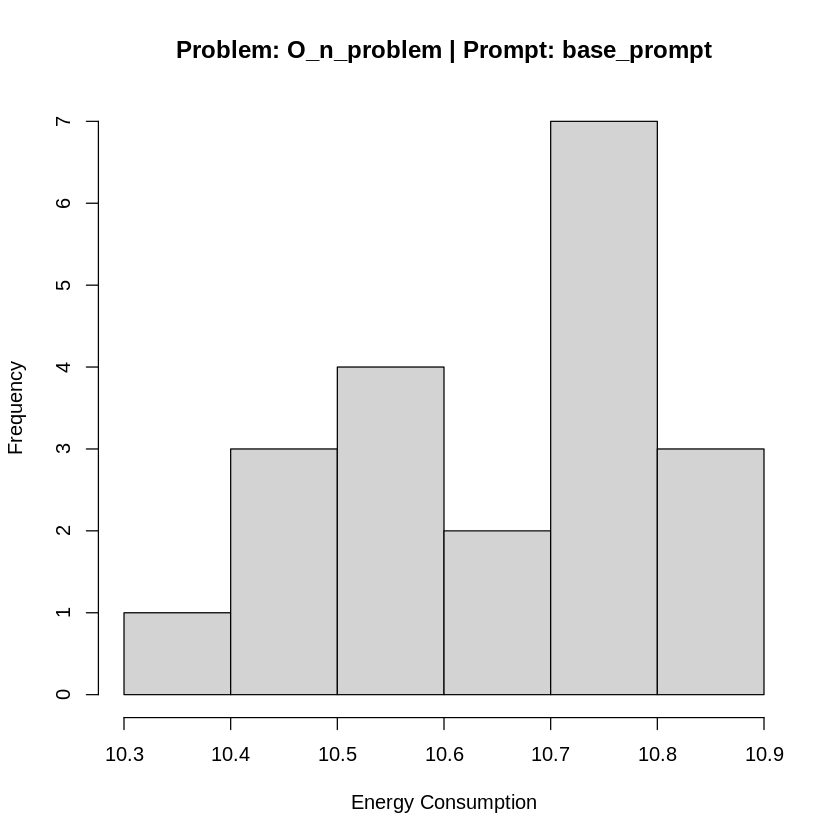

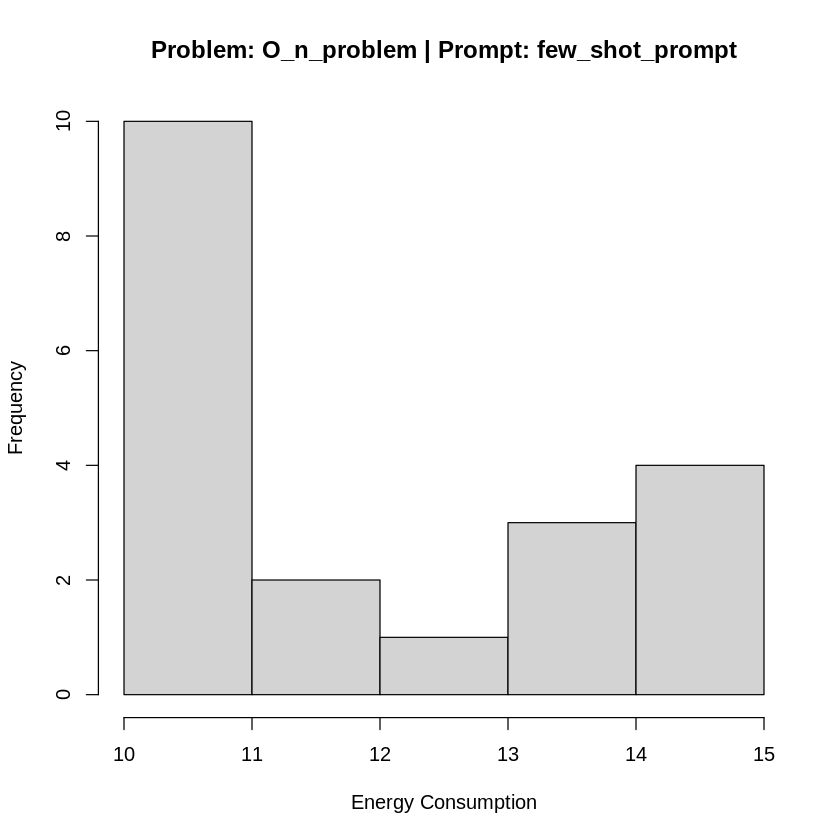

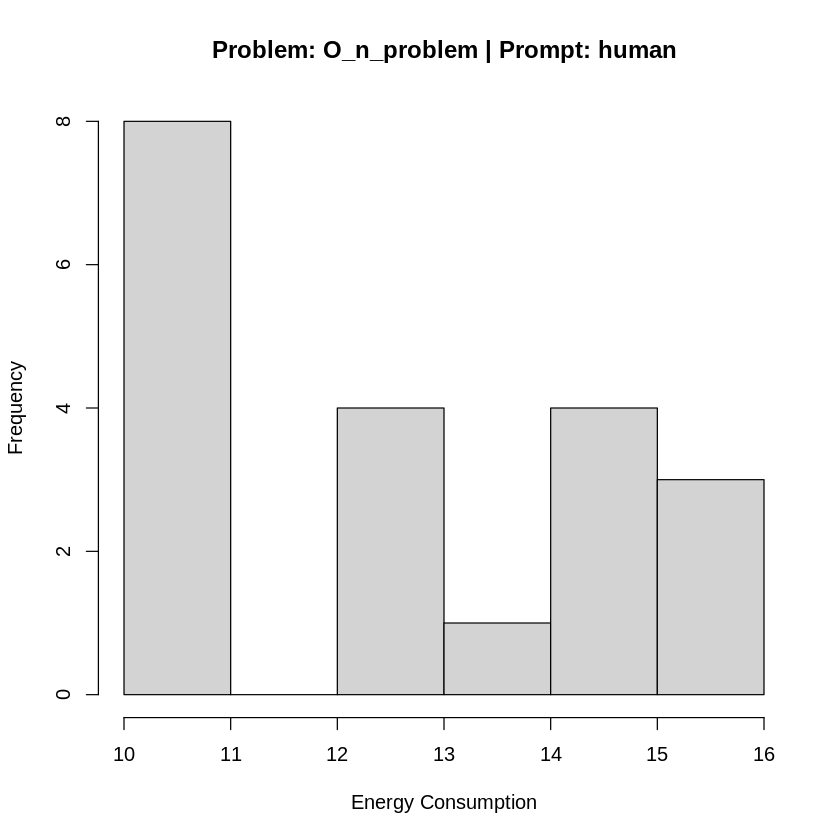

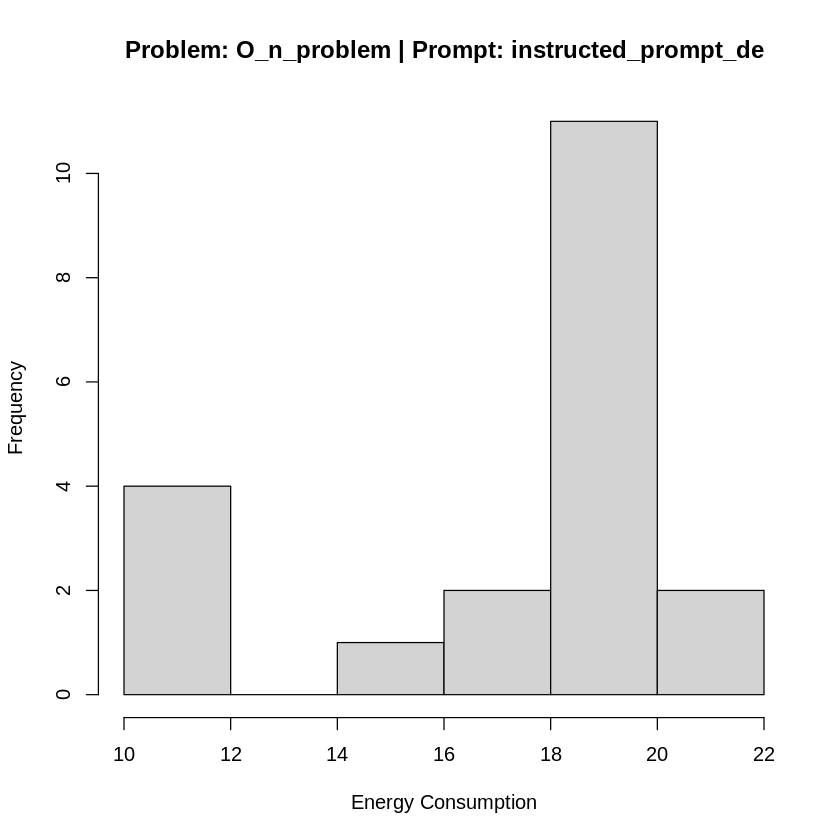

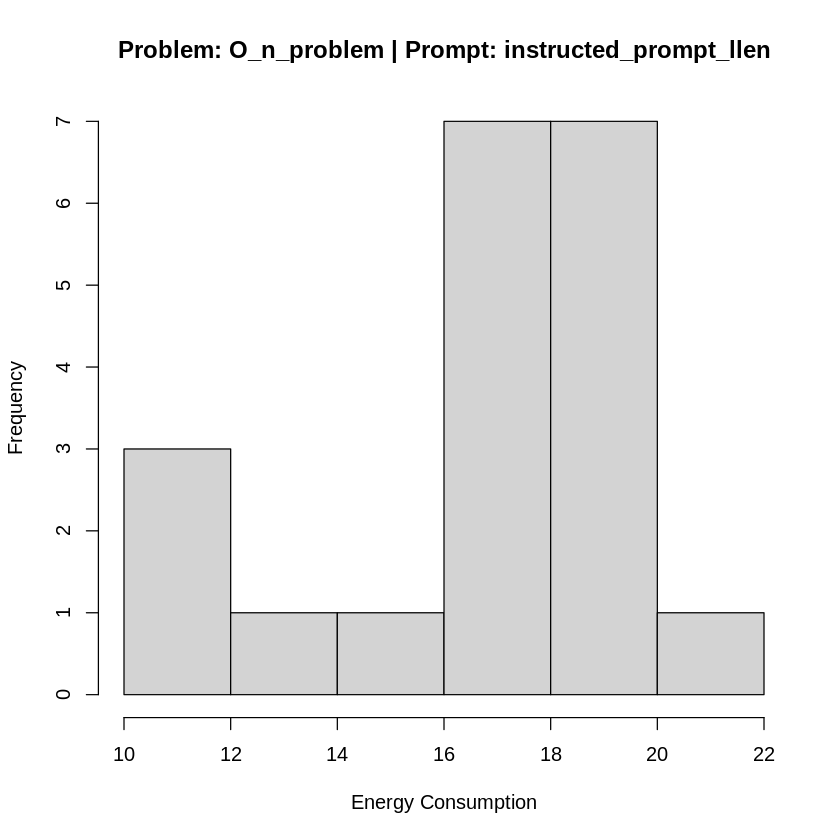

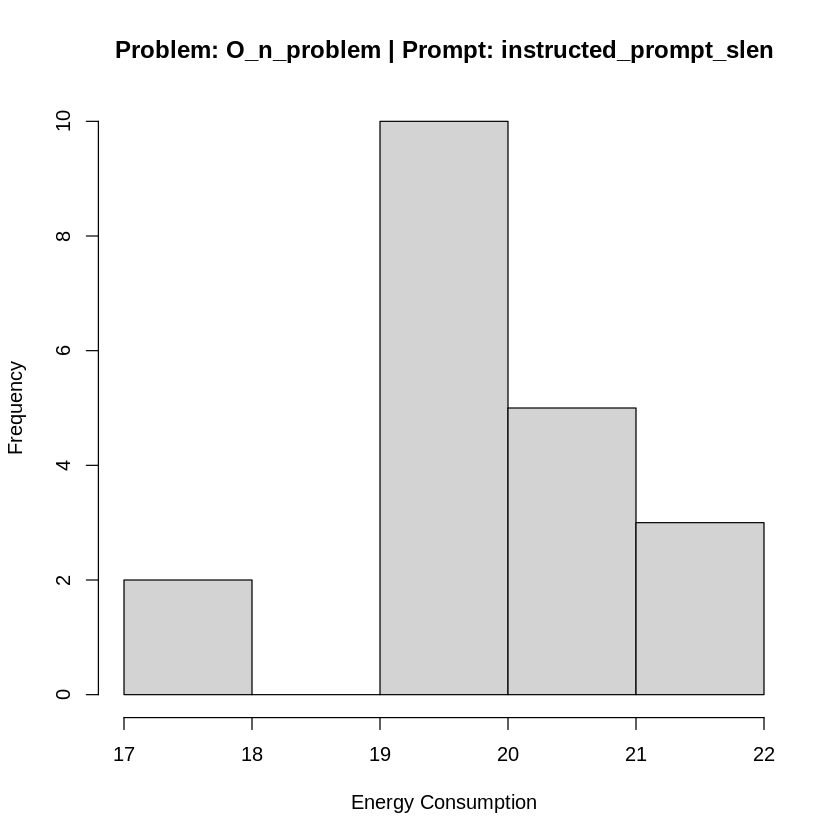

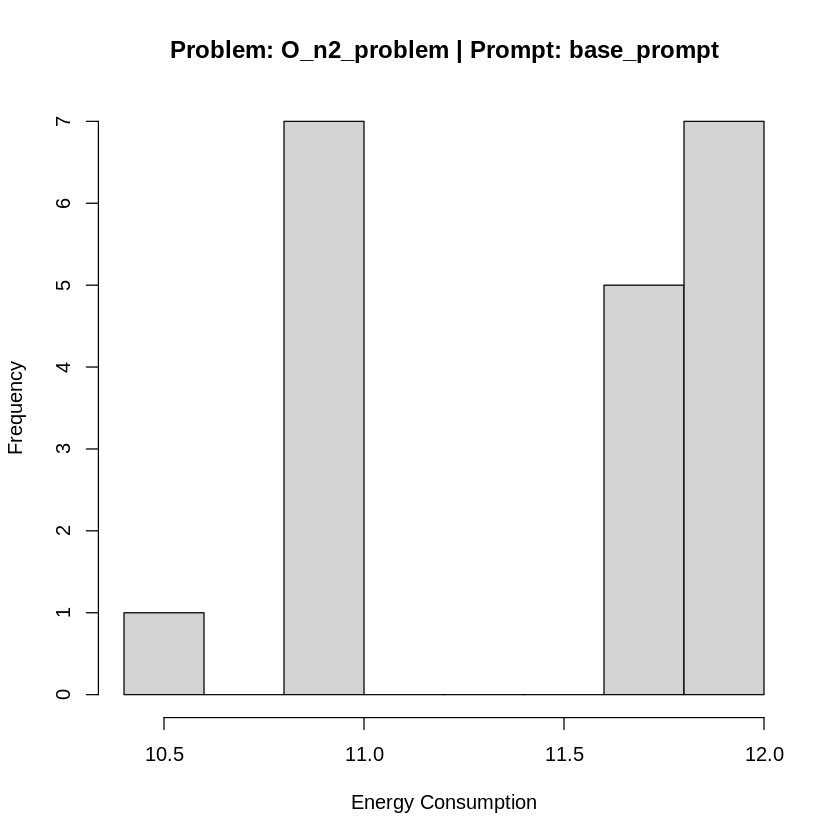

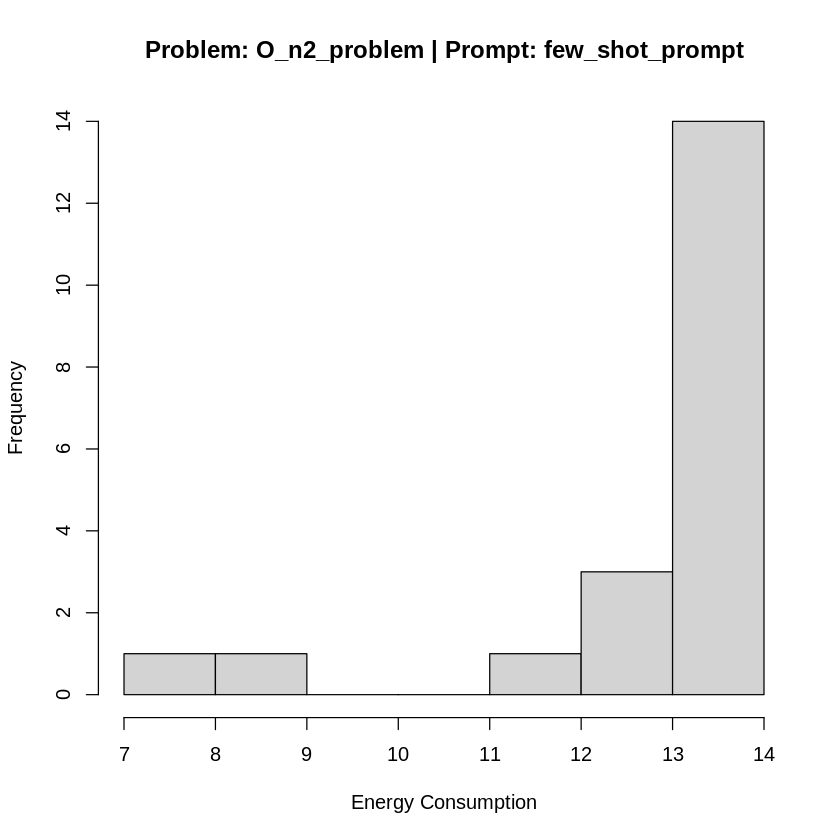

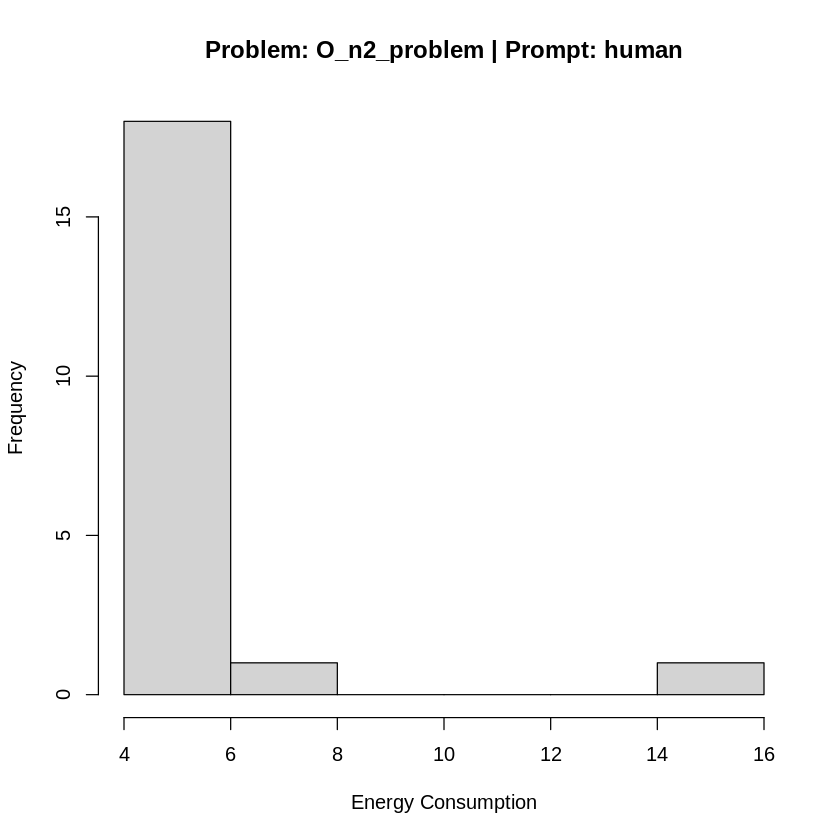

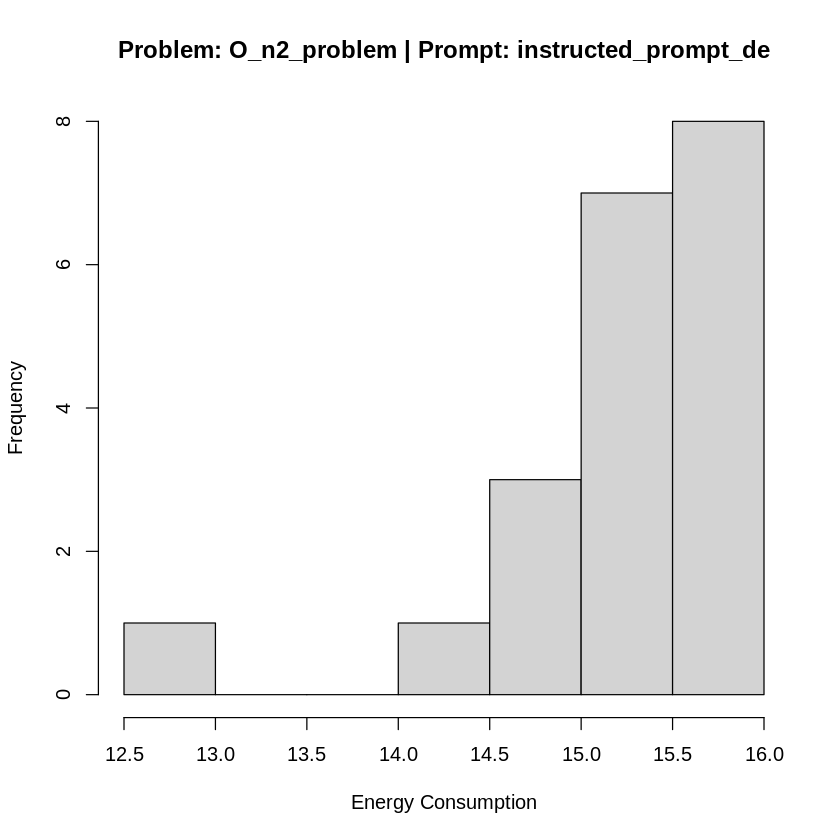

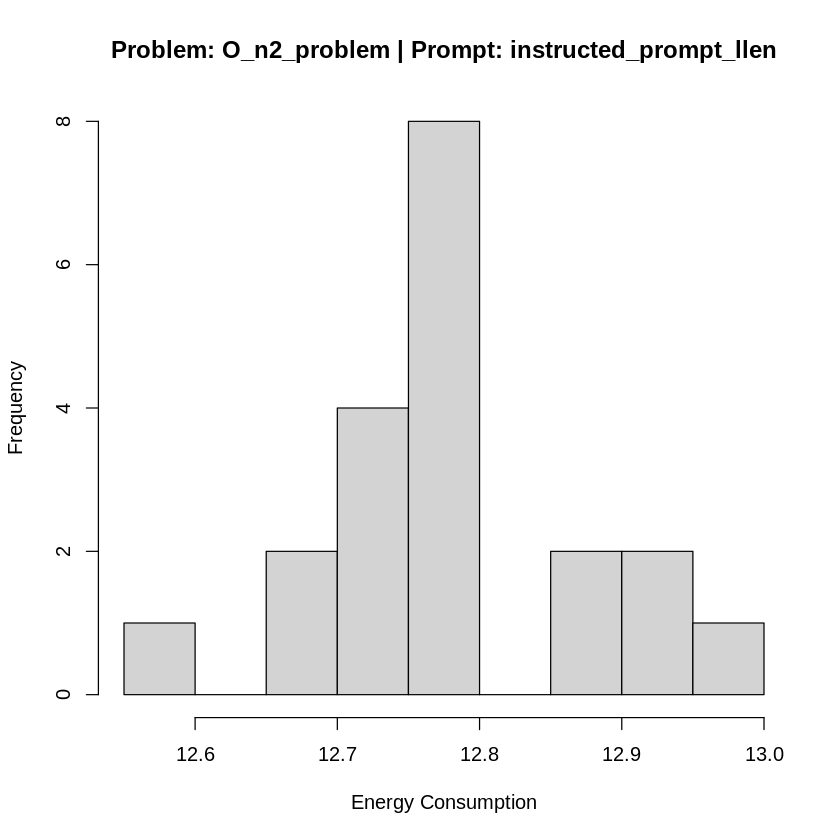

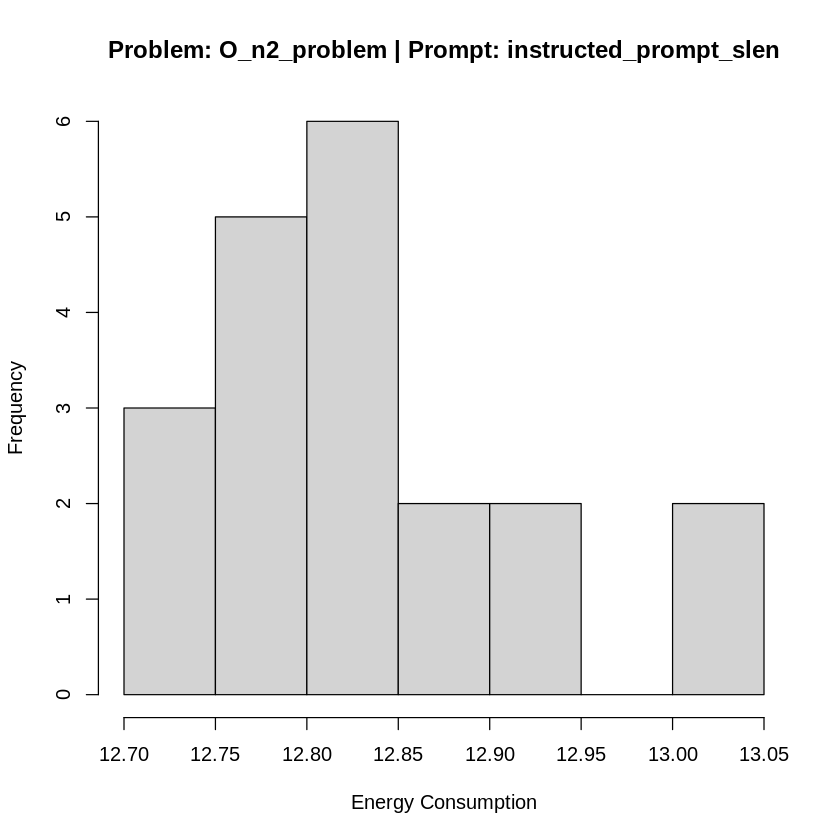

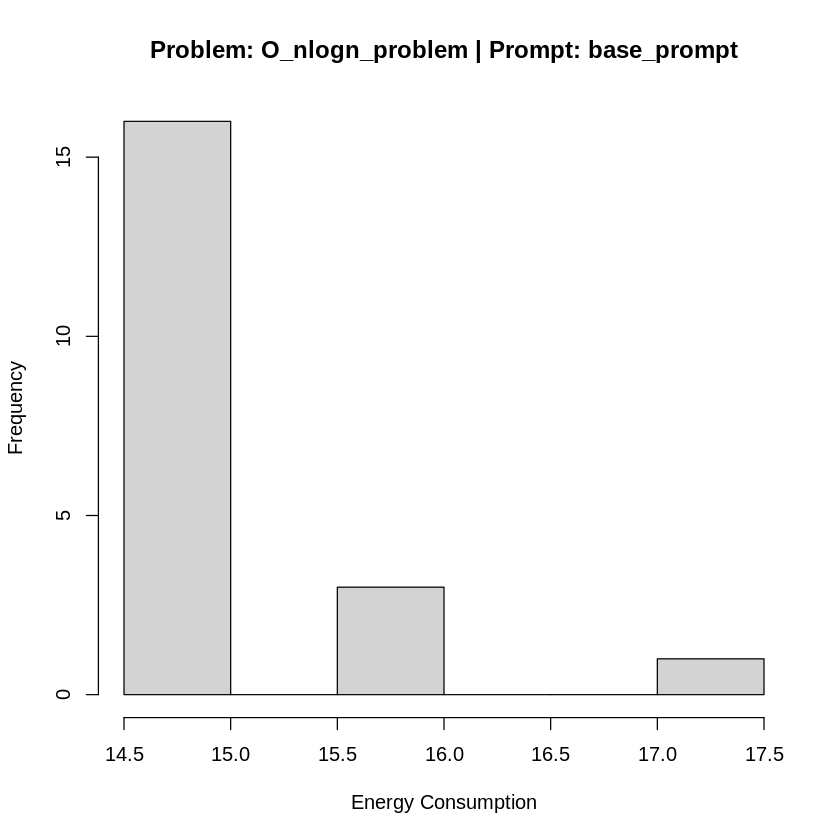

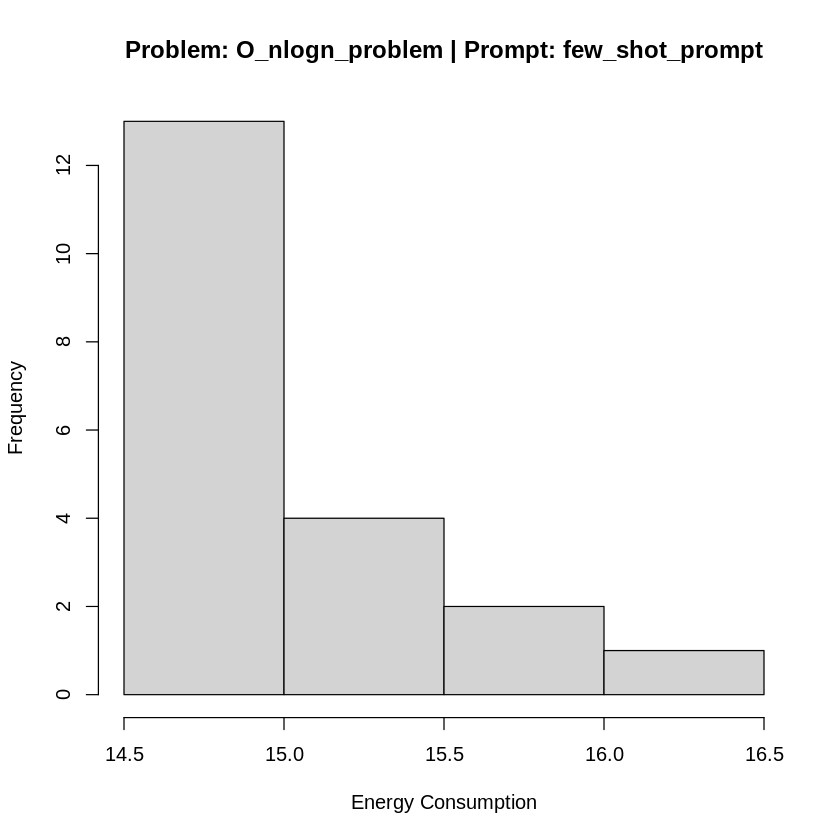

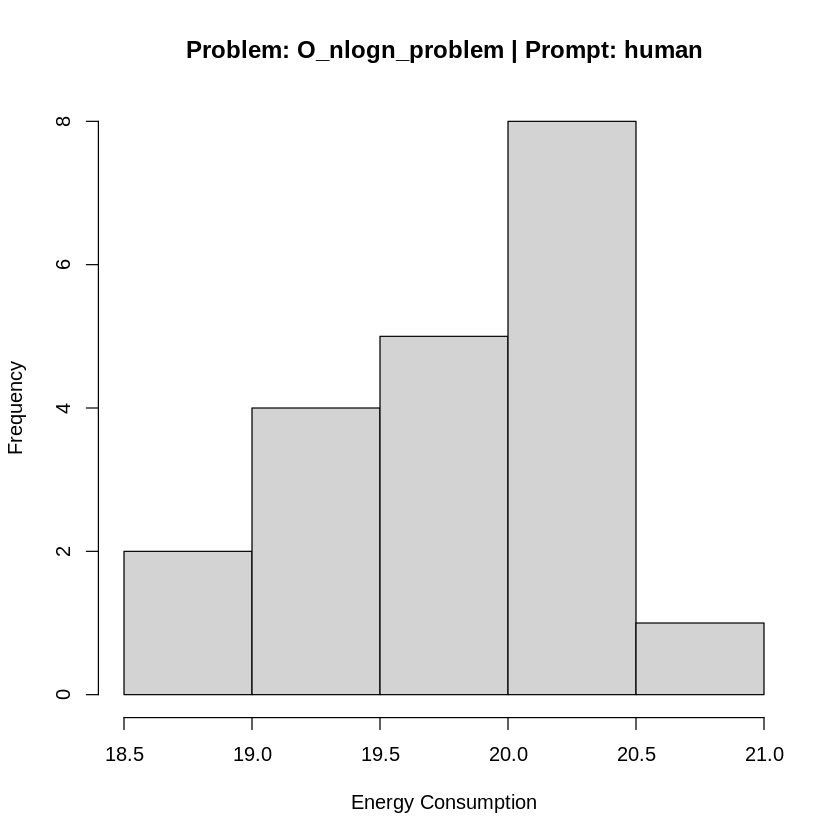

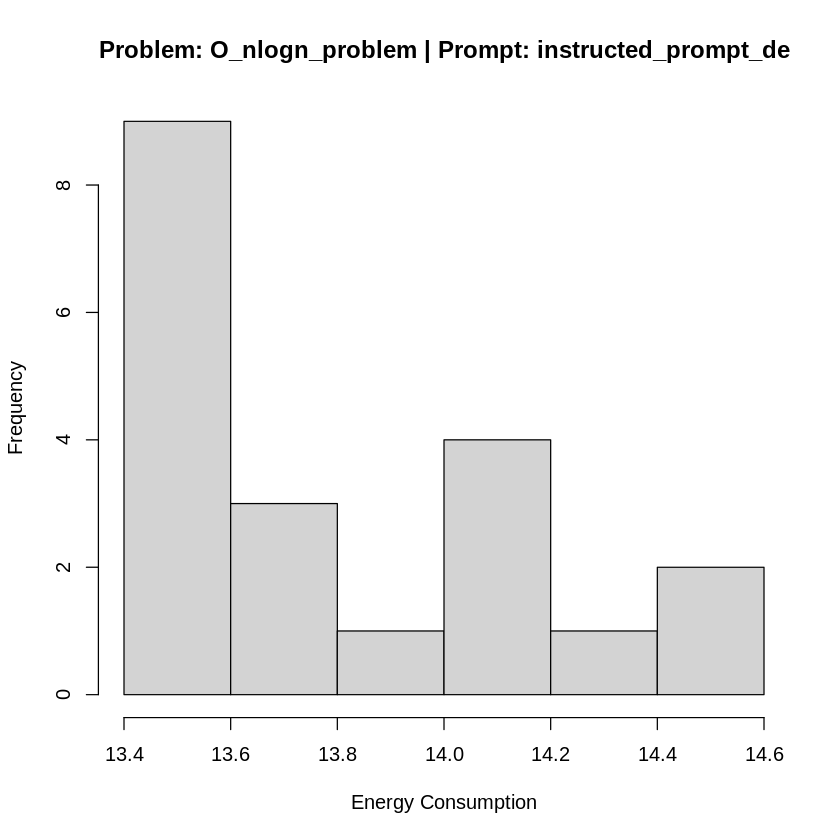

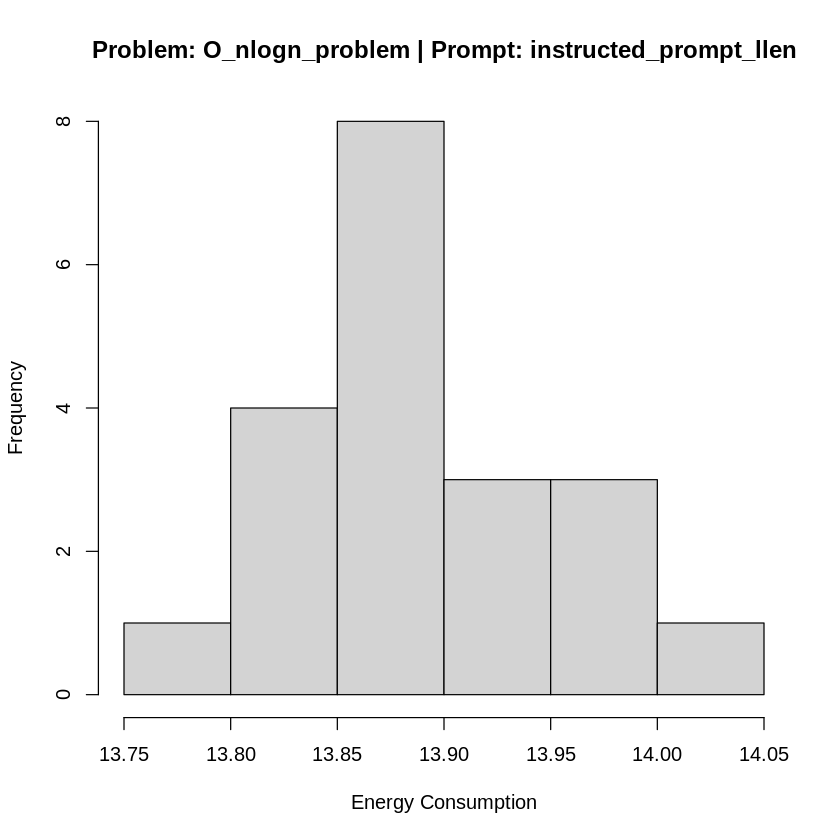

[[1]]
$breaks
[1] 10.3 10.4 10.5 10.6 10.7 10.8 10.9

$counts
[1] 1 3 4 2 7 3

$density
[1] 0.5 1.5 2.0 1.0 3.5 1.5

$mids
[1] 10.35 10.45 10.55 10.65 10.75 10.85

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[2]]
$breaks
[1] 10 11 12 13 14 15

$counts
[1] 10  2  1  3  4

$density
[1] 0.50 0.10 0.05 0.15 0.20

$mids
[1] 10.5 11.5 12.5 13.5 14.5

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[3]]
$breaks
[1] 10 11 12 13 14 15 16

$counts
[1] 8 0 4 1 4 3

$density
[1] 0.40 0.00 0.20 0.05 0.20 0.15

$mids
[1] 10.5 11.5 12.5 13.5 14.5 15.5

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[4]]
$breaks
[1] 10 12 14 16 18 20 22

$counts
[1]  4  0  1  2 11  2

$density
[1] 0.100 0.000 0.025 0.050 0.275 0.050

$mids
[1] 11 13 15 17 19 21

$xname
[1] "group_data$energy_consumption"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

[[5]]
$break

`summarise()` has grouped output by 'problem'. You can override using the
`.groups` argument.


problem,prompts,n,stest
<fct>,<fct>,<int>,<dbl>
O_n_problem,base_prompt,20,4.465468e-02
O_n_problem,few_shot_prompt,20,5.081842e-04
O_n_problem,human,20,2.309283e-03
O_n_problem,instructed_prompt_de,20,3.437373e-04
O_n_problem,instructed_prompt_llen,20,1.315285e-03
O_n_problem,instructed_prompt_slen,20,3.704882e-01
O_n2_problem,base_prompt,20,1.669340e-04
O_n2_problem,few_shot_prompt,20,3.716788e-06
O_n2_problem,human,20,5.358720e-08


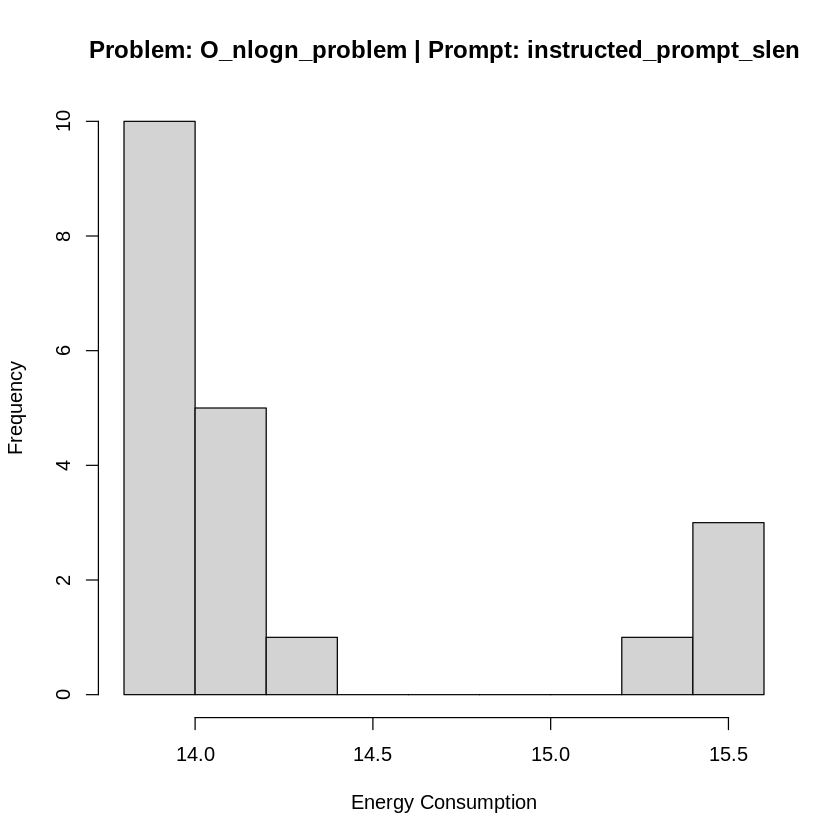

In [ ]:
## Plotting
# We can utilize dplyr package and group_by feature to run all of the setups at once,
# with the use of pipe operator (%>%)

df %>%
  group_by(problem, prompts) %>%
  group_split() %>%
  lapply(function(group_data) {
    hist(group_data$energy_consumption,
         main = paste("Problem:", unique(group_data$problem),
                      "| Prompt:", unique(group_data$prompts)),
         xlab = "Energy Consumption")
  })


Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_density()`).”


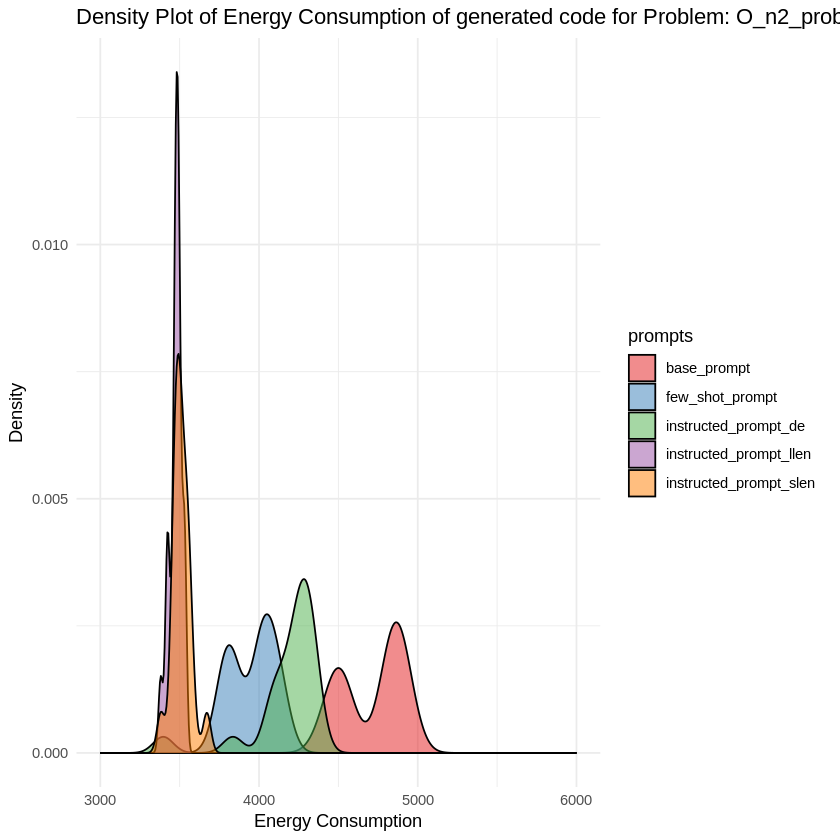

In [ ]:
'''
1. Generate the density plot

'''

library(dplyr)
library(ggplot2)

# Specify the problem you want to focus on
specific_problem <- "O_n2_problem"  # Change this to the desired problem

# Filter the data for the specific problem
df_filtered <- df %>%
  filter(problem == specific_problem)

# Create the density plot with x-axis limits from 0 to 2
plot <- ggplot(df_filtered, aes(x = energy_consumption, fill = prompts)) +
  geom_density(alpha = 0.5) +  # Adjust alpha for transparency
  ggtitle(paste("Density Plot of Energy Consumption of generated code for Problem:", specific_problem)) +
  xlab("Energy Consumption") +
  ylab("Density") +
  theme_minimal() +
  scale_fill_brewer(palette = "Set1") +  # Optional: change color palette
  xlim(3000, 6000)  # Set x-axis limits from 0 to 2

# Display the plot
print(plot)

# Save the plot
ggsave("density_plot_O_n2_problem_generated.png", plot = plot, width = 8, height = 6, dpi = 300)

In [ ]:
'''
2. Drawing QQ plots
'''
install.packages("patchwork")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(patchwork)  # For combining multiple plots

# Specify your data
problems <- unique(df$problem)  # Unique problems in the dataset
prompts <- unique(df$prompts)   # Unique prompt techniques

# Create an empty list to store the plots
plot_list <- list()

# Loop over each problem and prompt to generate Q-Q plots
for (prompt in prompts) {
  for (problem in problems) {

    # Filter the data for the specific problem and prompt
    df_filtered <- df %>%
      filter(problem == problem, prompts == prompt)

    # Create Q-Q plot for the filtered data
    qq_plot <- ggplot(df_filtered, aes(sample = energy_consumption)) +
      stat_qq() +
      stat_qq_line() +  # Adds a reference line
      ggtitle(paste("Q-Q Plot:", problem, "-", prompt)) +
      theme_minimal() +
      theme(plot.title = element_text(size = 10))  # Adjust the title size

    # Add the plot to the list
    plot_list[[length(plot_list) + 1]] <- qq_plot
  }
}

# Combine the plots into a 6x3 grid
combined_plot <- wrap_plots(plot_list, ncol = 3)

# Save the combined plot
ggsave(
  filename = "combined_qq_plots.png",
  plot = combined_plot,
  width = 15, height = 18  # Adjust the size as needed
)

In [ ]:
'''
3. Generate the shapiro summary table

'''

summary_table <- df %>%
  group_by(problem, prompts) %>%
  summarize(n = n(),
            stest = shapiro.test(energy_consumption)$p.value,
            normality_decision = ifelse(stest < 0.05, "Not Normal", "Normal"))

print(summary_table)

write.csv(summary_table, "summary_table.csv", row.names = True)

`summarise()` has grouped output by 'problem'. You can override using the
`.groups` argument.


# A tibble: 18 × 5
# Groups:   problem [3]
   problem         prompts                    n         stest normality_decision
   <fct>           <fct>                  <int>         <dbl> <chr>             
 1 O_n_problem     base_prompt               20 0.0000102     Not Normal        
 2 O_n_problem     few_shot_prompt           20 0.00117       Not Normal        
 3 O_n_problem     human                     20 0.0000235     Not Normal        
 4 O_n_problem     instructed_prompt_de      20 0.00000175    Not Normal        
 5 O_n_problem     instructed_prompt_llen    20 0.00000655    Not Normal        
 6 O_n_problem     instructed_prompt_slen    20 0.0000000281  Not Normal        
 7 O_n2_problem    base_prompt               20 0.0000679     Not Normal        
 8 O_n2_problem    few_shot_prompt           20 0.00000000876 Not Normal        
 9 O_n2_problem    human                     20 0.0000000588  Not Normal        
10 O_n2_problem    instructed_prompt_de      20 0.0000350     Not 

ERROR: Error in eval(expr, p): object 'True' not found


In [ ]:
'''
Optional: Use bestNormalize package to normalize data
'''
install.packages("bestNormalize")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘RcppParallel’, ‘plyr’, ‘prodlim’, ‘lamW’, ‘reshape2’, ‘iterators’, ‘rngtools’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘lobstr’, ‘LambertW’, ‘nortest’, ‘doParallel’, ‘foreach’, ‘doRNG’, ‘recipes’, ‘butcher’




In [ ]:


library(bestNormalize)
df$norm_energy_consumption = bestNormalize(df$energy_consumption)$x.t
df %>%
  group_by(problem, prompts) %>%
  group_split() %>%
  lapply(function(group_data) {
    hist(group_data$norm_energy_consumption,
         main = c(unique(group_data$problem), unique(group_data$prompts)),
         xlab = "Energy Consumption")
  })
# Conducting shapiro-test for normality test
df %>%
  group_by(problem, prompts) %>%
  summarize(n = n(),
            stest = shapiro.test(norm_energy_consumption)$p.value,
            normality_decision = ifelse(stest < 0.05, "Not Normal", "Normal"))

## Hypothesis Testing

*   For data doesn't follow normal distribution (non-parametric tests,)


    1.	Mann-Whitney U Test: A non-parametric equivalent of the t-test for two independent groups.
	2.	Kruskal-Wallis Test: A non-parametric alternative to ANOVA.
	3.	Wilcoxon Signed-Rank Test: Used for paired or related samples to compare differences when the assumptions of a paired t-test are not met.





In [ ]:
'''
Conduct Kruskal-Wallis Test
'''

library(dplyr)

# For a specific problem, e.g., O(n)
data_on <- df %>% filter(problem == "O_n_problem"& prompts != "human")
result_on <- kruskal.test(energy_consumption ~ prompts, data = data_on)
print(result_on)

# O_nlogn_problem
data_on <- df %>% filter(problem == "O_nlogn_problem"& prompts != "human")
result_on <- kruskal.test(energy_consumption ~ prompts, data = data_on)
print(result_on)

# O_logn^2_problem
data_on <- df %>% filter(problem == "O_n2_problem"& prompts != "human")
result_on <- kruskal.test(energy_consumption ~ prompts, data = data_on)
print(result_on)


	Kruskal-Wallis rank sum test

data:  energy_consumption by prompts
Kruskal-Wallis chi-squared = 15.064, df = 4, p-value = 0.00457


	Kruskal-Wallis rank sum test

data:  energy_consumption by prompts
Kruskal-Wallis chi-squared = 88.018, df = 4, p-value < 2.2e-16


	Kruskal-Wallis rank sum test

data:  energy_consumption by prompts
Kruskal-Wallis chi-squared = 79.784, df = 4, p-value < 2.2e-16



## Further study with Post-hoc analysis

The purpose of performing Post-hoc analysis: Since the Kruskal-Wallis test only tells you that at least one group (prompt technique) is significantly different, but not which specific pairs of prompts differ, you should perform a post-hoc test (such as Dunn’s test) to identify exactly which prompt techniques differ in their energy consumption.

In [ ]:
install.packages("dunn.test")
library(dunn.test)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Filter out the 'human' prompt from the dataset for O(n) problem
data_on_filtered <- df %>%
  filter(problem == "O_n2_problem", prompts != "human")

# Perform the Kruskal-Wallis test on the filtered data
kruskal_result <- kruskal.test(energy_consumption ~ prompts, data = data_on_filtered)
print(kruskal_result)

# Perform Dunn's post-hoc test to compare each pair of prompts
dunn_result <- dunn.test(data_on_filtered$energy_consumption, data_on_filtered$prompts, method = "bonferroni")
print(dunn_result)


	Kruskal-Wallis rank sum test

data:  energy_consumption by prompts
Kruskal-Wallis chi-squared = 79.784, df = 4, p-value < 2.2e-16

  Kruskal-Wallis rank sum test

data: x and group
Kruskal-Wallis chi-squared = 79.784, df = 4, p-value = 0


                           Comparison of x by group                            
                                 (Bonferroni)                                  
Col Mean-|
Row Mean |   base_pro   few_shot   instruct   instruct
---------+--------------------------------------------
few_shot |   4.038481
         |    0.0003*
         |
instruct |   2.599670  -1.438811
         |     0.0467     0.7510
         |
instruct |   7.728161   3.689679   5.128490
         |    0.0000*    0.0011*    0.0000*
         |
instruct |   6.888854   2.850372   4.289183  -0.839306
         |    0.0000*    0.0218*    0.0001*     1.0000

alpha = 0.05
Reject Ho if p <= alpha/2
$chi2
[1] 79.78396

$Z
 [1]  4.0384820  2.5996706 -1.4388114  7.7281612  3.6896792  5.1284906
 [